In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import itertools as iter
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix

###**Functions**

In [ ]:
# Decision Boundary

def plot_decision_boundary(model, x, y):

  #Boundaries
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 0].max() + 0.1

  #Meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1 :
    print("Doing Multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y ,s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


# Confusion Matrix

def plot_confusion_matrix(y_test, y_preds):
  c_matrix = confusion_matrix(y_test, tf.round(y_preds))
  c_matrix_norm = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis] # to normalize confuion matrix
  n_classes= c_matrix.shape[0]

  fig, ax = plt.subplots(figsize=(10,10))
  
  # Matrix plot
  c_ax = ax.matshow(c_matrix, cmap=plt.cm.Blues) # matshow() displays an array as a matrix in a new figure window.
  fig.colorbar(c_ax)

  # Classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(c_matrix.shape[0])
  
  # Labeling
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)
  
  color_threshold = (c_matrix.max() + c_matrix.min())/2.

  # Ploting text on each cell
  for i, j in iter.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
    plt.text(j, i, f"{c_matrix[i, j]} ({c_matrix_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if c_matrix[i, j] > color_threshold else "black",
             size=15) 



###**Demo Data**

In [ ]:
n_samples= 1000

x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
x[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [ ]:
y[:5]

array([1, 1, 1, 1, 0])

In [ ]:
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]
len(x_train), len(y_train)

(800, 800)

In [ ]:
demo_data = pd.DataFrame({"x0":x[:,0],"x1":x[:,1], "y(label)":y})
demo_data

,x0,x1,y(label)
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


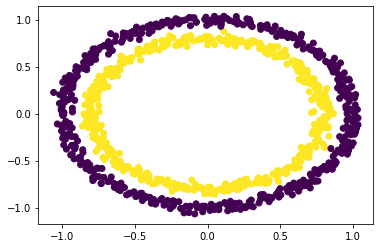

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y)

###**Model 1** with linear Activation Function and epochs = 100

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation="linear"),
        tf.keras.layers.Dense(4, activation="linear"),
        tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model_1.fit(x, y, epochs=100, verbose=0)
print("Finished")

Finished


>**Model 1** Evaluation

In [ ]:
model_1.evaluate(x,y)

32/32 [==============================] - 0s 912us/step - loss: 0.6932 - accuracy: 0.5130


[0.693151593208313, 0.5130000114440918]

Doing Binary classification


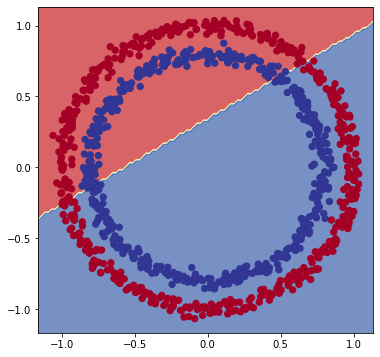

In [ ]:
 plt.figure(figsize=(6,6))
 plot_decision_boundary(model=model_1, x=x, y=y)

###**Model 2** with Non-linear Activation Function(ReLU, Sigmoid) and epochs = 20

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics="accuracy")

In [ ]:
model_2.fit(x, y, epochs=20, verbose=0)
print("Finished")

Finished


>**Model 2** Evaluation

In [ ]:
model_2.evaluate(x, y) # evaluateing with the same set as traing set

32/32 [==============================] - 0s 998us/step - loss: 0.6697 - accuracy: 0.5630


[0.6696737408638, 0.5630000233650208]

Doing Binary classification


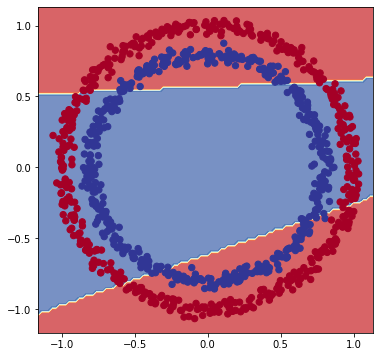

In [ ]:
plt.figure(figsize=(6,6))
plot_decision_boundary(model_2, x, y)

###**Model 3** with training and test set, epochs = 20

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics="accuracy")

In [ ]:
history_3 = model_3.fit(x_train, y_train, epochs=20, verbose=0)
print("Finished")

Finished


>**Model 3** Evaluation

In [ ]:
model_3.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9600


[0.19134357571601868, 0.9599999785423279]

Doing Binary classification
Doing Binary classification


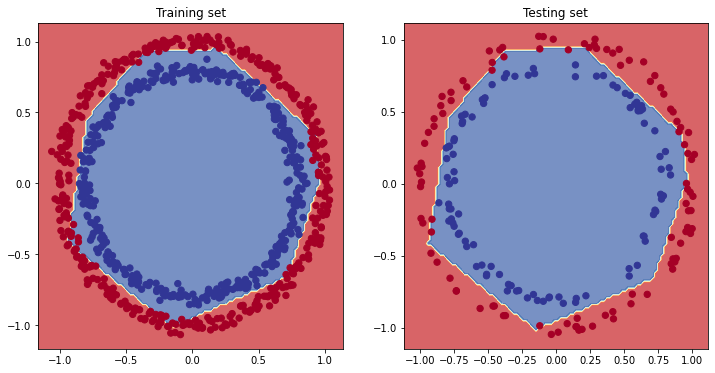

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training set")
plot_decision_boundary(model=model_3, x=x_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Testing set")
plot_decision_boundary(model=model_3, x=x_test, y=y_test)

(        loss  accuracy
 0   0.684651   0.54250
 1   0.677721   0.55250
 2   0.673595   0.55125
 3   0.668149   0.57750
 4   0.663269   0.58500
 5   0.654567   0.58375
 6   0.641258   0.67500
 7   0.626428   0.70125
 8   0.603831   0.74875
 9   0.571404   0.77375
 10  0.540443   0.76500
 11  0.501504   0.78375
 12  0.468332   0.79750
 13  0.411302   0.84500
 14  0.362506   0.91250
 15  0.320904   0.93125
 16  0.284708   0.94875
 17  0.259720   0.95250
 18  0.237469   0.95625
 19  0.213520   0.96625,
 Text(0.5, 1.0, 'model_3 loss curves'))

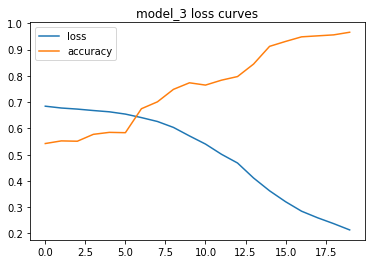

In [ ]:
#Loss Curves
pd.DataFrame(history_3.history), pd.DataFrame(history_3.history).plot(), plt.title("model_3 loss curves")

###**Model 4** with Learning Rate callback (To find the optimal Learning Rate)

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics="accuracy")

In [ ]:
#Learning Rate Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) #1e-4 = 10^-4

history_4 = model_4.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=1)
print("Finished")

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

>**Model 4** Evaluation

In [ ]:
model_4.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4950


[0.6933157444000244, 0.4950000047683716]

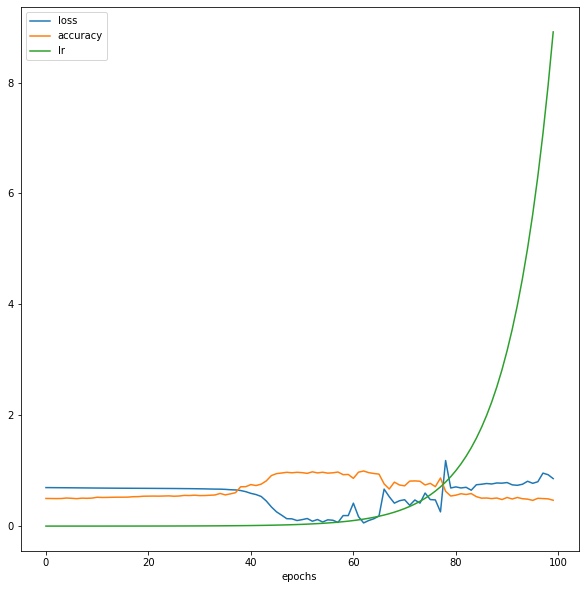

In [ ]:
pd.DataFrame(history_4.history).plot(figsize=(10,10), xlabel="epochs")

In [ ]:
learning_rates = 1e-4 * (10 **(tf.range(100)/20))
learning_rates

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'LR vs. Loss')

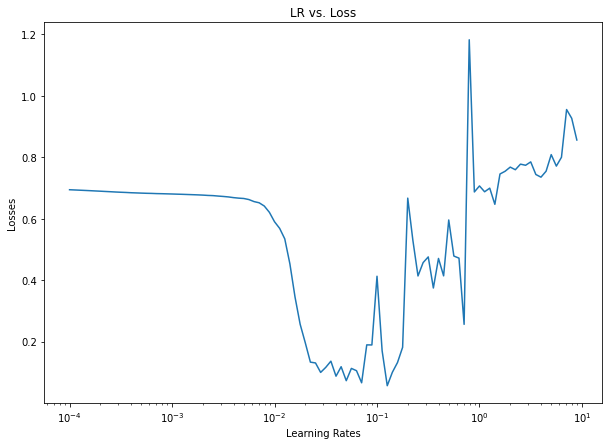

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_4.history["loss"])
plt.xlabel("Learning Rates")
plt.ylabel("Losses")
plt.title("LR vs. Loss")


#To find ideal Learning Rate, find the point slightly before than the lowest point.

###**Model 5** with Improved Learning Rate(0.04), epochs = 20


In [ ]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.04),
                metrics="accuracy")

In [ ]:
history_5= model_5.fit(x_train, y_train, epochs=20, verbose=1)
print("Finished")

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5562
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.6112
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5683 - accuracy: 0.7588
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3892 - accuracy: 0.9125
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2301 - accuracy: 0.9700
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1449 - accuracy: 0.9850
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.9887
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9862
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.9875
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0600 - accuracy: 0.9912
Epoch 11/20
25/25 [

>**Model 5** Evaluation With *Confusion Matrix*

In [ ]:
model_5.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9900


[0.0359082855284214, 0.9900000095367432]

In [ ]:
y_preds = model_5.predict([x_test])

Consider rewriting this model with the Functional API.


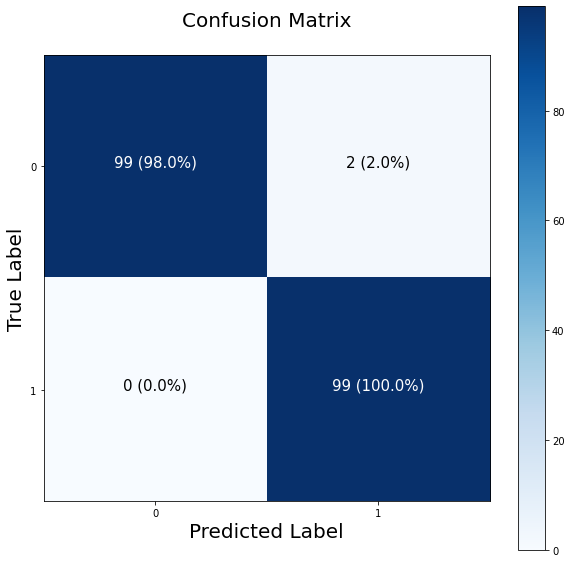

In [ ]:
# confusion matrix
plot_confusion_matrix(y_test=y_test, y_preds=y_preds)

(        loss  accuracy
 0   0.682095   0.55625
 1   0.657355   0.61125
 2   0.568302   0.75875
 3   0.389197   0.91250
 4   0.230089   0.97000
 5   0.144920   0.98500
 6   0.101570   0.98875
 7   0.085249   0.98625
 8   0.072301   0.98750
 9   0.059981   0.99125
 10  0.070325   0.97875
 11  0.054267   0.98875
 12  0.065947   0.98000
 13  0.048523   0.98750
 14  0.049729   0.98500
 15  0.052875   0.99125
 16  0.042564   0.99000
 17  0.035359   0.99125
 18  0.028684   0.99500
 19  0.042267   0.98750,
 Text(0.5, 1.0, 'model_5 loss curves'))

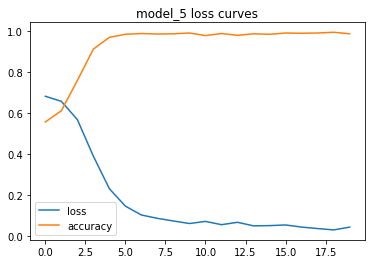

In [ ]:
#Loss Curves
pd.DataFrame(history_5.history), pd.DataFrame(history_5.history).plot(), plt.title("model_5 loss curves")

Doing Binary classification
Doing Binary classification


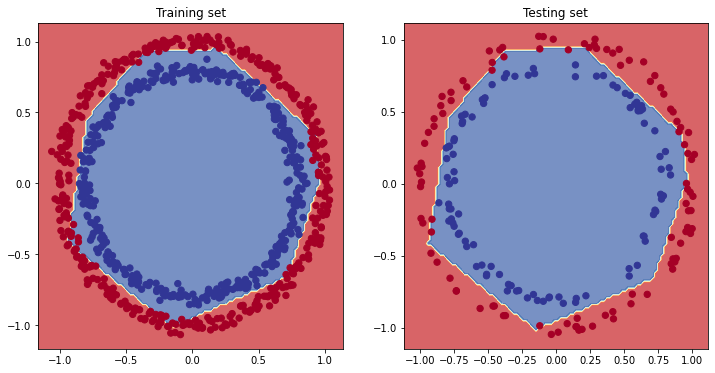

In [ ]:
# model_5 decison boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training set")
plot_decision_boundary(model=model_3, x=x_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Testing set")
plot_decision_boundary(model=model_3, x=x_test, y=y_test)